In [1]:
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
from chebGreen.backend import plt
from chebGreen.utils import runCustomScript

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
%%time
example = 'laplace'
script = 'generate_example'
theta = None
Nsample = 250
lmbda = 0.01
Nf = 500
Nu = 500
noise_level = 0
runCustomScript(script,example,theta,Nsample,lmbda,Nf,Nu,noise_level)

### Example = laplace ###
Number of samples: 250
Length scale: 0.01
Nf: 500
Nu: 500
Noise: 0%
---------------------------------------
    0.0100

Step = 1/250
Step = 2/250
Step = 3/250
Step = 4/250
Step = 5/250
Step = 6/250
Step = 7/250
Step = 8/250
Step = 9/250
Step = 10/250
Step = 11/250
Step = 12/250
Step = 13/250
Step = 14/250
Step = 15/250
Step = 16/250
Step = 17/250
Step = 18/250
Step = 19/250
Step = 20/250
Step = 21/250
Step = 22/250
Step = 23/250
Step = 24/250
Step = 25/250
Step = 26/250
Step = 27/250
Step = 28/250
Step = 29/250
Step = 30/250
Step = 31/250
Step = 32/250
Step = 33/250
Step = 34/250
Step = 35/250
Step = 36/250
Step = 37/250
Step = 38/250
Step = 39/250
Step = 40/250
Step = 41/250
Step = 42/250
Step = 43/250
Step = 44/250
Step = 45/250
Step = 46/250
Step = 47/250
Step = 48/250
Step = 49/250
Step = 50/250
Step = 51/250
Step = 52/250
Step = 53/250
Step = 54/250
Step = 55/250
Step = 56/250
Step = 57/250
Step = 58/250
Step = 59/250
Step = 60/250
Step = 61/250
Step = 62

In [3]:
data = DataProcessor(f"datasets/{example}/data.mat")
data.generateDataset(trainRatio = 0.95)

In [4]:
model = GreenNN()
dimension = 1
domain = [-1,1,-1,1]
layerConfig = [50,50,50,50]
activation = 'rational'
dirichletBC = False
model.build(dimension, domain, layerConfig, activation, dirichletBC)

In [5]:
%%time
lossHistory = model.train(data, epochs = {'adam':int(5000), 'lbfgs':int(0)})

Training with Adam:
Loss at epoch 100: Training = 1.955E-01, Validation = 2.118E-01
Loss at epoch 200: Training = 2.047E-02, Validation = 2.967E-02
Loss at epoch 300: Training = 7.545E-03, Validation = 1.606E-02
Loss at epoch 400: Training = 4.651E-03, Validation = 1.268E-02
Loss at epoch 500: Training = 3.099E-03, Validation = 9.915E-03
Loss at epoch 600: Training = 1.899E-03, Validation = 6.116E-03
Loss at epoch 700: Training = 6.561E-03, Validation = 7.377E-03
Loss at epoch 800: Training = 1.081E-03, Validation = 3.410E-03
Loss at epoch 900: Training = 8.792E-04, Validation = 2.724E-03
Loss at epoch 1000: Training = 7.424E-04, Validation = 2.305E-03
Loss at epoch 1100: Training = 6.162E-04, Validation = 1.905E-03
Loss at epoch 1200: Training = 5.519E-04, Validation = 1.561E-03
Loss at epoch 1300: Training = 6.971E-04, Validation = 1.396E-03
Loss at epoch 1400: Training = 4.062E-04, Validation = 1.157E-03
Loss at epoch 1500: Training = 3.722E-04, Validation = 1.029E-03
Loss at epoch 

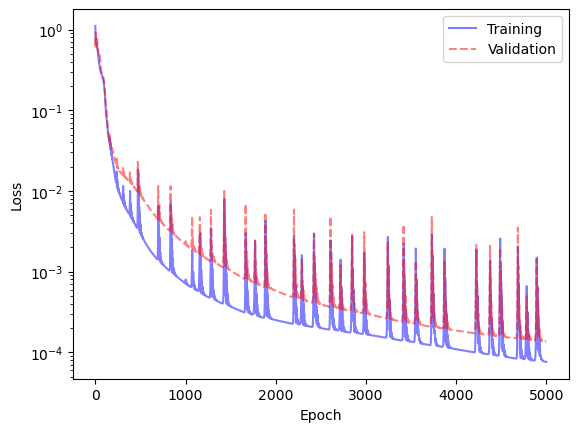

In [10]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

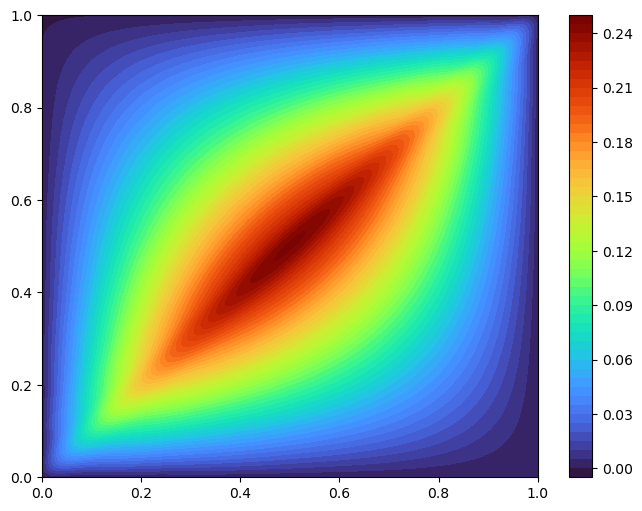

In [11]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

In [12]:
model.saveModels(f'savedModels/{example}')

In [13]:
savedModel = GreenNN()
savedModel.build(loadPath = f'savedModels/{example}')

In [14]:
def green(x,s):
    g = 0
    g = (x <= s) * (x * (1-s)) + (x > s) * (s * (1-x))
    # np.random.seed(42)
    # g = g + np.random.normal(loc = 0.0, scale = 0.25 * eps * factor, size=x.shape)
    return g

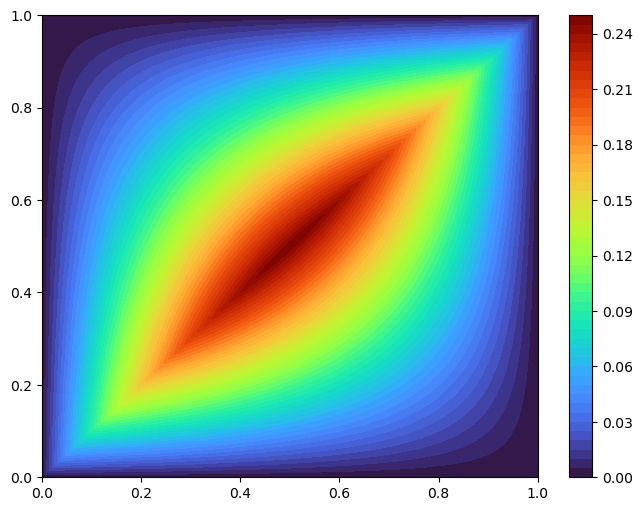

In [15]:
Gexact = green(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,Gexact, 50, cmap = 'turbo', vmin = np.min(Gexact), vmax = np.max(Gexact))
plt.colorbar()

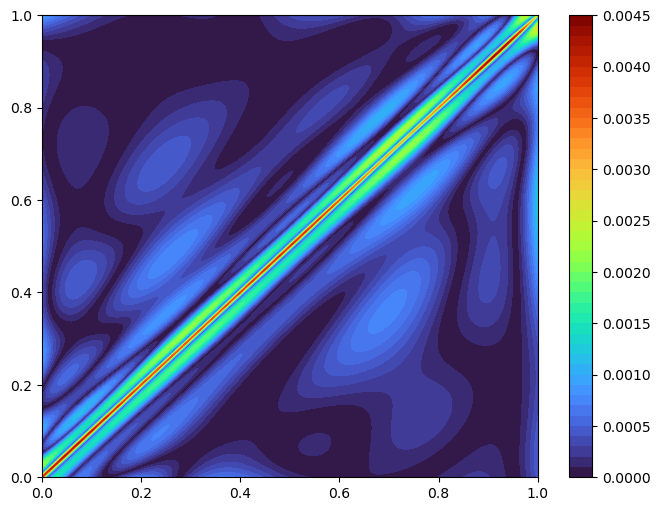

In [16]:
fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,np.abs(G-Gexact), 50, cmap = 'turbo')
plt.colorbar()